In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
articles = pd.read_csv('../data/processed/articles_munged.csv', parse_dates=True)

In [76]:
articles.head()

,Unnamed: 0,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR
0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207
1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811
2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637
3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037
4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682


In [62]:
# set X 
X = articles['HEADLINE']

In [63]:
# examine X
X

0            2 under-the-radar tech stocks to buy in 2022 
1        does it matter that gamestop's split will be a...
2                       is amazon stock a buy this month? 
3                2 stocks that cut you a check each month 
4        is amazon or alphabet the better stock split i...
                               ...                        
24940               why affimed stock is heating up today 
24941    3 beaten-down growth stocks -- can they recover? 
24942           why shares of dingdong are volatile today 
24943    this cybersecurity stock could just be getting...
24944        2 reasons i'm still not investing in ibuying 
Name: HEADLINE, Length: 24945, dtype: object

In [64]:
# instantiate count vectorizer
cvect = CountVectorizer(stop_words='english', max_features=150)

In [65]:
# fit on headlinge
Xv = cvect.fit_transform(X)

In [66]:
Xv

<24945x150 sparse matrix of type '<class 'numpy.int64'>'
	with 71269 stored elements in Compressed Sparse Row format>

In [67]:
kmeans = KMeans(n_clusters = 10).fit(Xv)

In [68]:
kmeans.labels_

array([7, 3, 3, ..., 9, 3, 1], dtype=int32)

In [77]:
articles['HEADLINE_GROUP'] = kmeans.labels_

In [78]:
articles.head()

,Unnamed: 0,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,7
1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,3
2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,3
3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,2
4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,3


In [79]:
articles['HEADLINE_GROUP'] .value_counts()

1    9047
3    4320
9    2581
2    2403
0    1838
7    1523
6    1301
8     959
5     609
4     364
Name: HEADLINE_GROUP, dtype: int64

In [80]:
articles.groupby(['HEADLINE_GROUP', 'HEADLINE']).count()

Unnamed: 0  \
HEADLINE_GROUP HEADLINE                                                         
0              (bsy) q3 2020 earnings call transcript                       1   
               (hrmy) q3 2020 earnings call transcript                      1   
               (ntst) q3 2020 earnings call transcript                      1   
               (ptve) q3 2020 earnings call transcript                      1   
               (viao) q3 2020 earnings call transcript                      1   
...                                                                       ...   
9              why zynga stock is getting clobbered today                   1   
               xpeng stock is crashing today: is it a buy?                  1   
               xrp sinks 7% today, despite major catalyst                   1   
               you'll pay amc $0.15 today, but will you pay mo...           1   
               zomedica stock jumped today. is it a buy?                    1   

                                                                   HEADLINE_LEN  \
HEADLINE_GROUP HEADLINE                                                           
0              (bsy) q3 2020 earnings call transcript                         1   
               (hrmy) q3 2020 earnings call transcript                        1   
               (ntst) q3 2020 earnings call transcript                        1   
               (ptve) q3 2020 earnings call transcript                        1   
               (viao) q3 2020 earnings call transcript                        1   
...                                                                         ...   
9              why zynga stock is getting clobbered today                     1   
               xpeng stock is crashing today: is it a buy?                    1   
               xrp sinks 7% today, despite major catalyst                     1   
               you'll pay amc $0.15 today, but will you pay mo...             1   
               zomedica stock jumped today. is it a buy?                      1   

                                                                   PUBLISH_DATE  \
HEADLINE_GROUP HEADLINE                                                           
0              (bsy) q3 2020 earnings call transcript                         1   
               (hrmy) q3 2020 earnings call transcript                        1   
               (ntst) q3 2020 earnings call transcript                        1   
               (ptve) q3 2020 earnings call transcript                        1   
               (viao) q3 2020 earnings call transcript                        1   
...                                                                         ...   
9              why zynga stock is getting clobbered today                     1   
               xpeng stock is crashing today: is it a buy?                    1   
               xrp sinks 7% today, despite major catalyst                     1   
               you'll pay amc $0.15 today, but will you pay mo...             1   
               zomedica stock jumped today. is it a buy?                      1   

                                                                   DAY_OF_WEEK  \
HEADLINE_GROUP HEADLINE                                                          
0              (bsy) q3 2020 earnings call transcript                        1   
               (hrmy) q3 2020 earnings call transcript                       1   
               (ntst) q3 2020 earnings call transcript                       1   
               (ptve) q3 2020 earnings call transcript                       1   
               (viao) q3 2020 earnings call transcript                       1   
...                                                                        ...   
9              why zynga stock is getting clobbered today                    1   
               xpeng stock is crashing today: is it a buy?                   1   
               xrp sinks 7% today

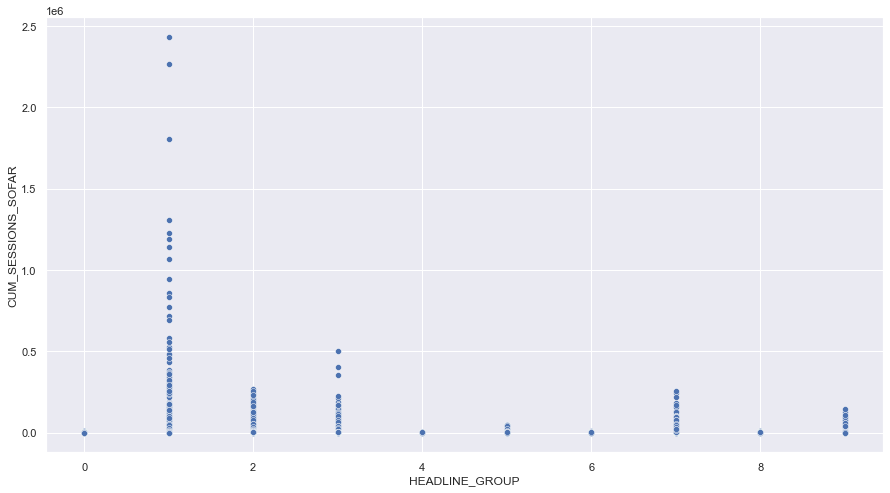

In [81]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles, x='HEADLINE_GROUP', y='CUM_SESSIONS_SOFAR' );

- the headline label does seem to have some relationship with the cumulative sessions

In [82]:
articles[articles['HEADLINE_GROUP']==1]

,Unnamed: 0,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
10,10,1 investment that could make you a millionaire...,59,2022-04-12,1,4,18000,Weekday,No,investment-planning,article,You don't need to be wealthy to become a stock...,734,1
11,11,1 massive green flag for nvidia's future,41,2022-04-12,1,4,26100,Weekday,No,technology-and-telecom,article,The graphics specialist's biggest business is ...,5033,1
12,12,3 social security moves to make before age 62,46,2022-04-12,1,4,20700,Weekday,No,investment-planning,article,These moves could help maximize your monthly c...,2531,1
13,13,the housing market just did something it hasn'...,64,2022-04-12,1,4,61680,Weekday,No,real estate,article,"It's not a surprising turn of events, but it's...",116834,1
19,19,why terawulf's shares plunged 30.1% on tuesday,47,2022-04-12,1,4,64800,Weekday,No,cryptocurrency,10% promise series,The market was not fond of a new stock sale.,164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24934,24934,what is happening with silvergate capital's st...,67,2022-02-01,1,2,27900,Weekday,No,cryptocurrency,article,The bank has long wanted to take advantage of ...,654,1
24935,24935,1 reason i'm watching citigroup this week,42,2022-04-11,0,4,25200,Weekday,No,financials,article,Management might provide more insight into fut...,1426,1
24936,24936,why sea limited floated above the market on mo...,51,2022-04-11,0,4,67140,Weekday,No,technology-and-telecom,10% promise series,An analyst at a prominent investment bank give...,255,1
24937,24937,the biggest deal of the year will tie up benet...,76,2022-04-11,0,4,72000,Weekday,No,other,article,"""Acqua in bocca,"" or keep the water in your mo...",91,1


In [83]:
articles.to_csv('../data/processed/articles_headline_group.csv')